# 📋 3주차 미션

### 라이브러리 및 데이터 로드 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [67]:
df[:2]

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  \
0  2017        1     1           13    46      170.0        65.0  91.0    1.0   
1  2017        2     2            8    41      150.0        45.0  73.4    1.2   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.2  ...   25.0   3.0   0.0          1      NaN    NaN      NaN   
1    1.0  ...   10.0   1.0   0.0          1      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  1.0  20181126  

[2 rows x 34 columns]

## 📌 Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [4]:
df['연령대코드(5세단위)'].values

array([13,  8,  8, ..., 12, 11,  9], dtype=int64)

In [73]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [74]:
# '연령대' 열을 생성하여 '연령대코드(5세단위)' 열의 값에 따라 연령대 문자열로 매핑
df['연령대'] = df['연령대코드(5세단위)'].map(age_code)

In [7]:
pd.pivot_table(df, index='연령대', values='허리둘레', aggfunc="describe" )

25%   50%   75%     count    max       mean   min        std
연령대                                                                  
20~24세  67.5  73.4  81.0   23244.0  999.0  75.152220  47.5  12.251781
25~29세  69.0  76.5  84.2   64898.0  999.0  77.704783  48.0  16.735734
30~34세  72.0  80.1  88.0   77517.0  999.0  81.089268  49.0  22.988111
35~39세  75.0  82.0  89.0   84621.0  999.0  82.094012   9.2  14.522095
40~44세  73.0  80.0  87.0  130912.0  999.0  80.488308  42.1  10.803098
45~49세  74.0  81.0  87.0  118357.0  137.0  80.822449  40.0   9.521622
50~54세  75.0  81.0  87.0  129833.0  142.0  81.062754   6.5   9.095438
55~59세  76.0  82.0  87.5  112175.0  139.0  81.799905  32.0   8.730398
60~64세  77.0  83.0  88.0  106491.0  137.0  82.722769   0.0   8.596176
65~69세  78.0  83.5  89.0   53624.0  129.0  83.588500  50.0   8.443542
70~74세  78.0  84.0  90.0   51586.0  129.8  84.063372  51.0   8.539639
75~79세  78.0  84.0  90.0   25972.0  122.0  84.200127  50.0   8.772306
80~84세  78.0  84.0  90.0   16205.0  120.0  83.751435  38.0   9.041091
85세+    75.0  81.5  88.0    4125.0  999.0  81.736703  34.0  17.325969

## 📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [13]:
# 시간이 오래 걸리기 때문에 데이터의 샘플로 추출
df_sample= df.sample(1000, random_state=1)

In [23]:
columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]

In [24]:
df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

음주여부      흡연상태  연령대코드(5세단위)      성별코드
음주여부         1.000000  0.365642    -0.277149 -0.350001
흡연상태         0.365642  1.000000    -0.136350 -0.604199
연령대코드(5세단위) -0.277149 -0.136350     1.000000  0.076229
성별코드        -0.350001 -0.604199     0.076229  1.000000

<Axes: >

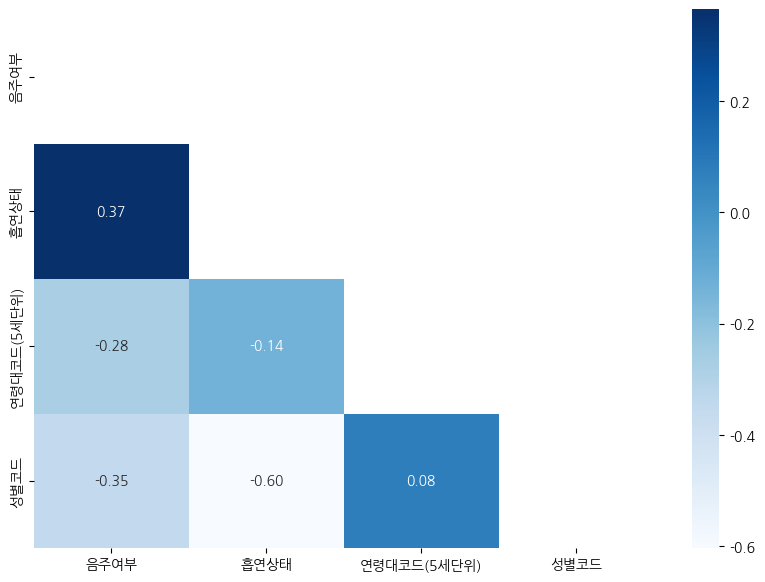

In [26]:
 mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=(10, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

## 📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

In [27]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# 딕셔너리의 값을 의미하는 문자 형태로 변경
df['흡연'] = df['흡연상태'].replace(smoke)
df['음주'] = df['음주여부'].replace(drink)

In [30]:
# 'smoke'와 'drink' 열을 기반으로 교차표 생성
cross_tab = pd.crosstab(df['흡연'], df['음주'])
cross_tab.T

흡연       끊음    흡연안함     흡연중
음주                         
마심   120779  213743  162166
안마심   55334  394503   52845

<Axes: xlabel='흡연', ylabel='count'>

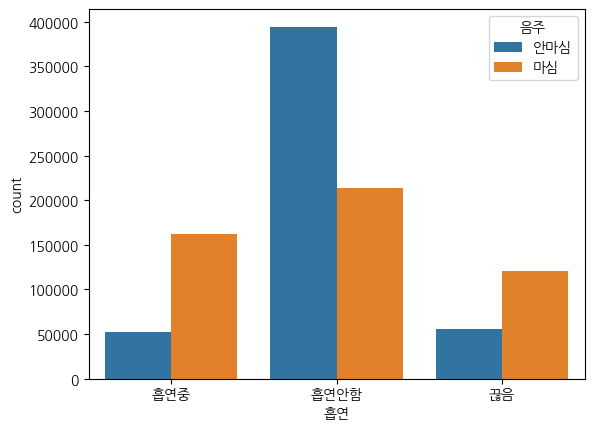

In [28]:
sns.countplot(x="흡연", data=df, hue="음주")

## 📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

In [51]:
# 체중이 120Kg 이상인 데이터
df_weight = df[df['체중(5Kg 단위)'] >= 120.0]

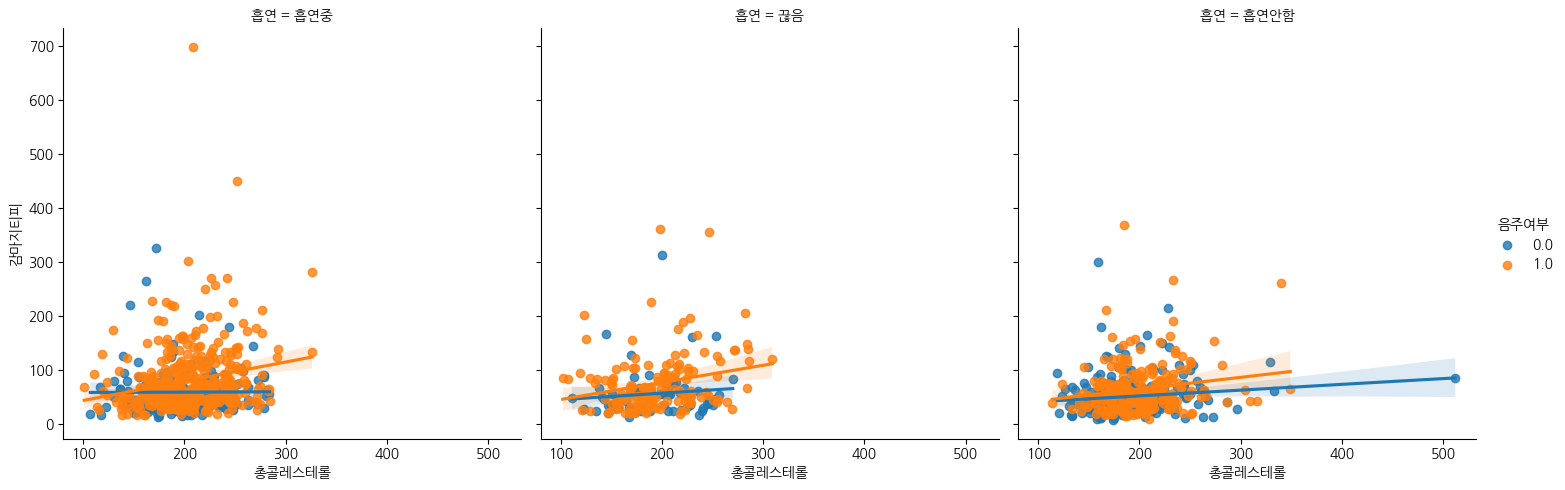

In [58]:
sns.lmplot(data=df_weight, x="총콜레스테롤", y="감마지티피", hue="음주여부", col="흡연")

## 📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

In [64]:
df['시력(좌)'] = df['시력(좌)'].apply(lambda x: 0.1 if x <= 0.1 else (9.9 if x >= 9.9 else x))
df['시력(우)'] = df['시력(우)'].apply(lambda x: 0.1 if x <= 0.1 else (9.9 if x >= 9.9 else x))

In [77]:
# 실명 = 9.9 drop
df = df[(df['시력(좌)'] != 9.9) & (df['시력(우)'] != 9.9)]

C:\Users\user\AppData\Local\Temp\ipykernel_21248\2070678439.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="시력(좌)", y="연령대", hue="성별코드", ci=None, order=df['연령대'].sort_values())


<Axes: xlabel='시력(좌)', ylabel='연령대'>

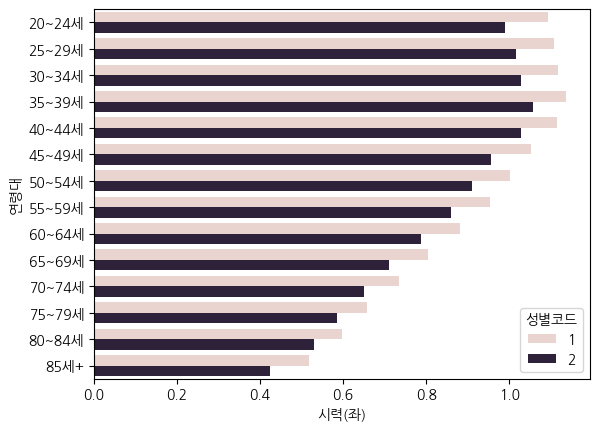

In [76]:
sns.barplot(data=df, x="시력(좌)", y="연령대", hue="성별코드", ci=None, order=df['연령대'].sort_values())

C:\Users\user\AppData\Local\Temp\ipykernel_21248\3469236106.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="시력(우)", y="연령대", hue="성별코드", ci=None, order=df['연령대'].sort_values())


<Axes: xlabel='시력(우)', ylabel='연령대'>

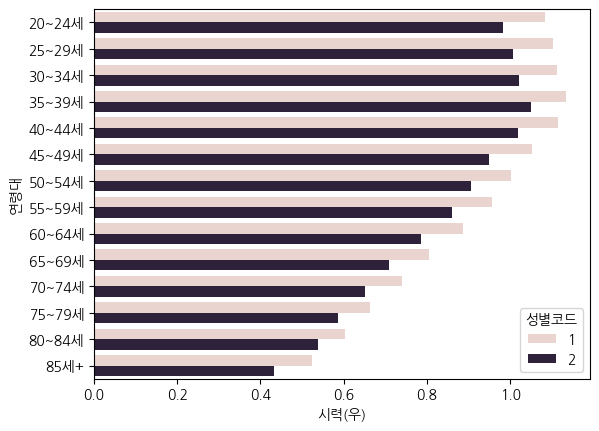

In [78]:
sns.barplot(data=df, x="시력(우)", y="연령대", hue="성별코드", ci=None, order=df['연령대'].sort_values())